# Model Evaluation

Below, the training and test data will be evaluated against different models. The evaluation will be accompanied with a **RMSE** (Root Mean Squared Error) checks to determine performance. This model evaluation focuses on predicting the case counts from the hospitalizations, death counts, and popularity rate.

In [2]:
import pandas as pd
from sklearn.metrics import  root_mean_squared_error

# I know it is hitchhiker's guide to the galaxy
r_state = 42

models_train = []
models_test = []

In [3]:
train_df = pd.read_csv('data/train_data.csv', index_col='date_of_interest')
test_df = pd.read_csv('data/test_data.csv', index_col='date_of_interest')

columns = train_df.columns

print (columns)


Index(['HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating',
       'norm_hosp_count_7day_avg', 'norm_death_count_7day_avg',
       'norm_popularity_rating', 'std_hosp_count_7day_avg',
       'std_death_count_7day_avg', 'std_popularity_rating', 'y'],
      dtype='object')


In [4]:
X_train = train_df.drop(labels=['y', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'norm_hosp_count_7day_avg', 'norm_death_count_7day_avg', 'norm_popularity_rating', 'popularity_rating'], axis=1)
y_train = train_df['y'].apply( lambda x: 1.0 * x)

X_test = test_df.drop(labels=['y', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'norm_hosp_count_7day_avg', 'norm_death_count_7day_avg', 'norm_popularity_rating', 'popularity_rating'], axis=1)
y_test = test_df['y'].apply( lambda x: 1.0 * x)

In [5]:

y_train.info()

<class 'pandas.core.series.Series'>
Index: 238 entries, 03/01/2020 to 08/25/2024
Series name: y
Non-Null Count  Dtype  
--------------  -----  
238 non-null    float64
dtypes: float64(1)
memory usage: 3.7+ KB


In [6]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 60 entries, 09/01/2024 to 10/12/2025
Series name: y
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 960.0+ bytes


In [7]:
X_train.head()

,std_hosp_count_7day_avg,std_death_count_7day_avg,std_popularity_rating
date_of_interest,,,
03/01/2020,-0.647999,-0.346949,-1.310849
03/08/2020,-0.609648,-0.346949,-0.329773
03/15/2020,-0.087116,-0.334692,0.294547
03/22/2020,2.156417,0.045268,0.740491
03/29/2020,6.125745,2.312771,1.409406


In [8]:
X_train.describe()

,std_hosp_count_7day_avg,std_death_count_7day_avg,std_popularity_rating
count,2.380000e+02,2.380000e+02,2.380000e+02
mean,2.985474e-17,5.970947e-17,-7.463684e-17
std,1.002107e+00,1.002107e+00,1.002107e+00
min,-6.479988e-01,-3.469492e-01,-1.310849e+00
25%,-4.754193e-01,-2.979221e-01,-7.645681e-01
50%,-3.076338e-01,-2.427666e-01,-2.851789e-01
75%,2.194506e-02,-1.293914e-01,6.067079e-01
max,7.367358e+00,9.152053e+00,2.836425e+00


In [9]:
test_ticks = X_test.index
train_ticks = X_train.sort_index

In [10]:
import matplotlib.pyplot as plt

def plot_line(y1, y2, ticks = test_ticks):
    working_data = {
        'actual' : y1,
        'predicted': y2
    }

    working_df = pd.DataFrame(working_data, index=ticks)
    ax = working_df.plot(kind="line", xlabel="Week Starting", ylabel="Average Count", figsize=(18,7))
    ax.set_xticks(range(len(working_df)))
    ax.set_xticklabels(working_df.index, rotation=45, ha='right')
    ax.grid(True, linestyle='dotted')


In [11]:
def gen_model_entry(name, y1, y2):
    entry = {
        'model' : name,
        'rmse' : root_mean_squared_error(y1, y2)
    }    

    return entry

## Bsaeline

In [12]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor()
dum_model = reg.fit(X_train, y_train)

y_pred = dum_model.predict(X_test)

In [13]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

1700.2091990783385


In [14]:
models_test.append(gen_model_entry('Dummy Regressor', y_test, y_pred))

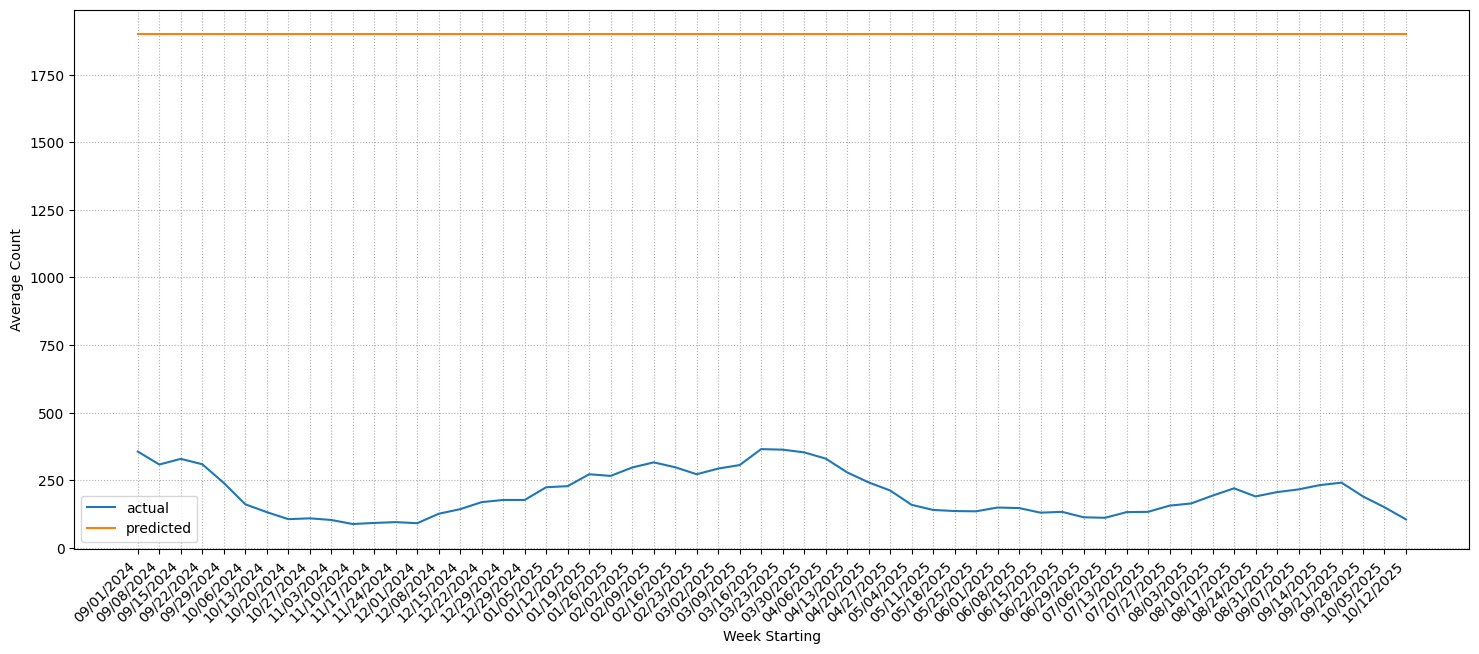

In [15]:
plot_line(y_test.to_list(), y_pred)

In [16]:
y_pred = dum_model.predict(X_train)
models_train.append(gen_model_entry('Dummy Regressor', y_train.to_list(), y_pred))

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=r_state, max_iter=1000)
log_model = reg.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

/home/mmcdougall/covid19-web-data-predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1201: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)


In [18]:
report = root_mean_squared_error(y_test, y_pred )
print (report)

6405.077415613336


In [19]:
models_test.append(gen_model_entry('Logistic Regressor', y_test, y_pred))

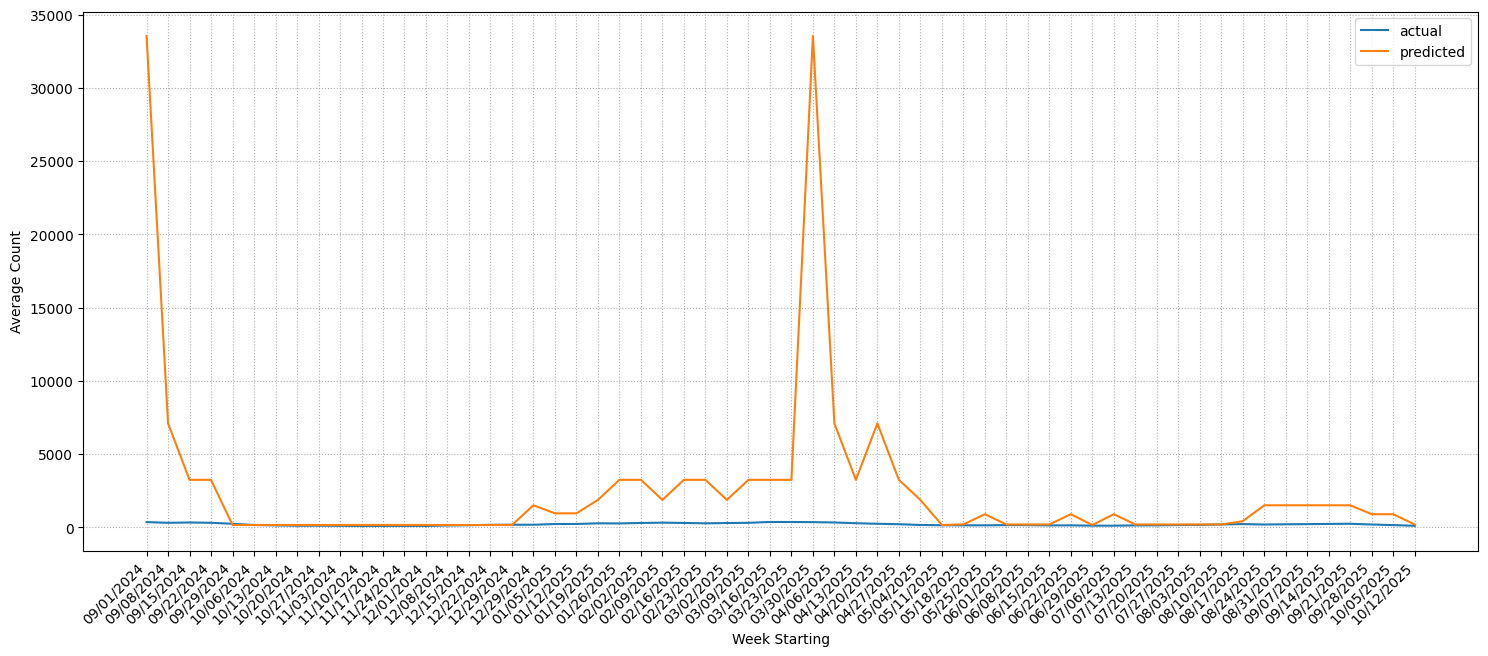

In [20]:
plot_line(y_test.to_list(), y_pred)

In [21]:
y_pred = log_model.predict(X_train)
models_train.append(gen_model_entry('Logistic Regressor', y_train.to_list(), y_pred))

## Linear Regressor

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
linear_model = reg.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [23]:
report = root_mean_squared_error(y_test, y_pred)
print (report)

3522.477680042295


In [24]:
models_test.append(gen_model_entry('Linear Regressor', y_test, y_pred))

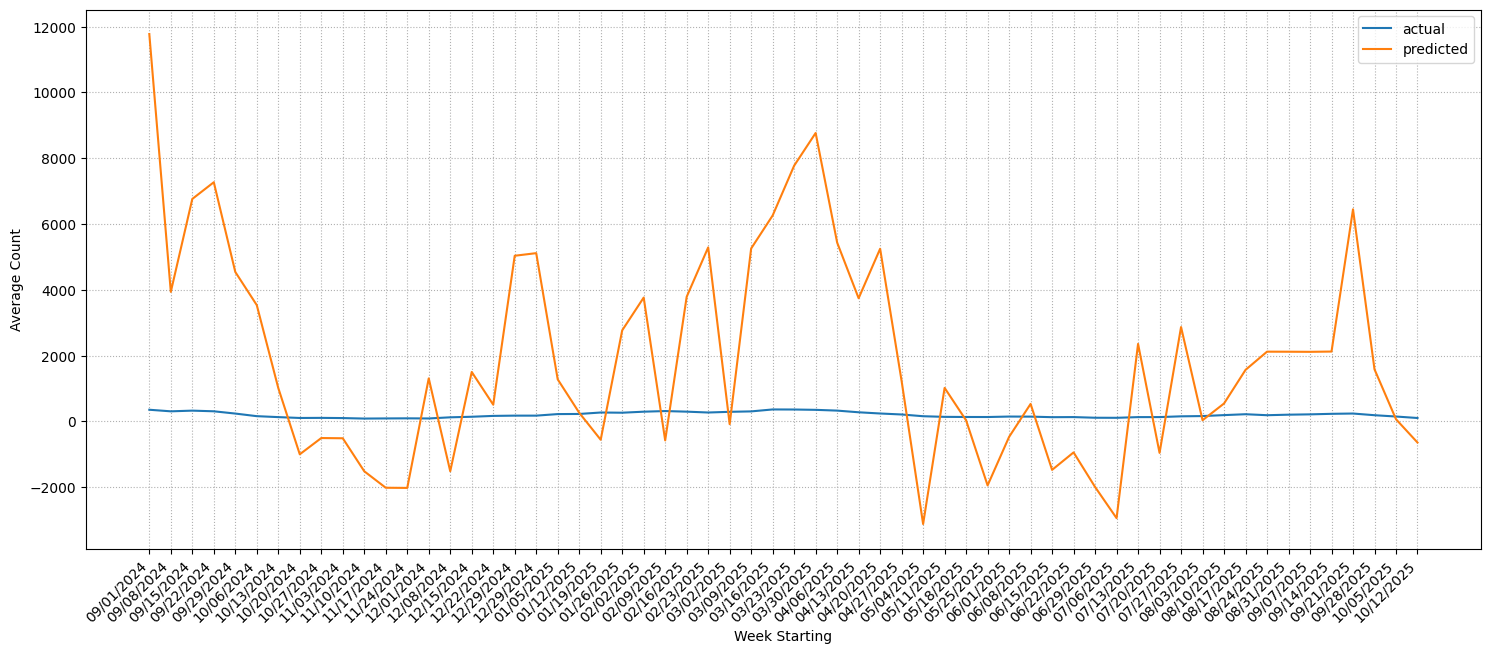

In [25]:
plot_line(y_test.to_list(), y_pred)

In [26]:
y_pred = linear_model.predict(X_train)
models_train.append(gen_model_entry('Linear Regressor', y_train.to_list(), y_pred))

## Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
dtree_model = reg.fit(X_train, y_train)

y_pred = dtree_model.predict(X_test)

In [28]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4777.045167604482


In [29]:
models_test.append(gen_model_entry('Tree Regressor', y_test, y_pred))

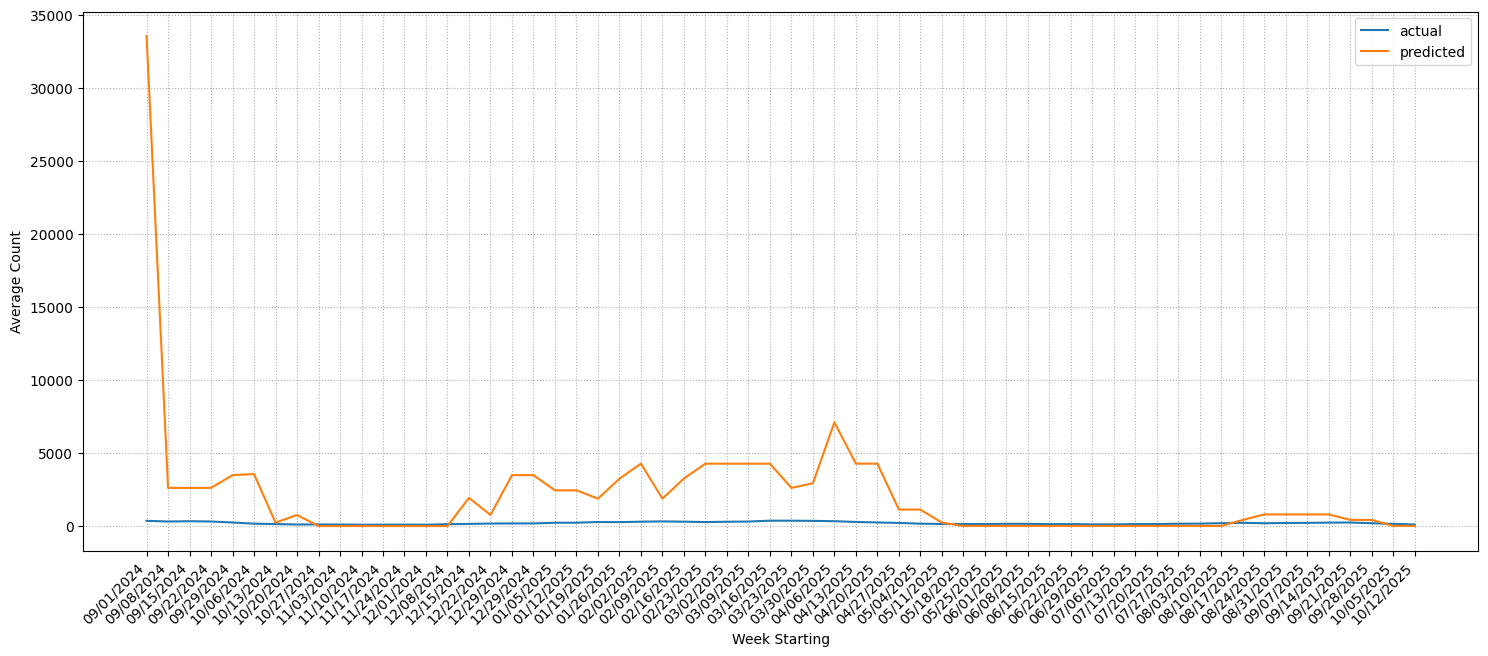

In [30]:
plot_line(y_test.to_list(), y_pred)

In [31]:
y_pred = dtree_model.predict(X_train)
models_train.append(gen_model_entry('Tree Regressor', y_train.to_list(), y_pred))

## Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
rfg_model = reg.fit(X_train, y_train)

y_pred = rfg_model.predict(X_test)

In [33]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4003.359466942732


In [34]:
models_test.append(gen_model_entry('Random Forest Regressor', y_test, y_pred))

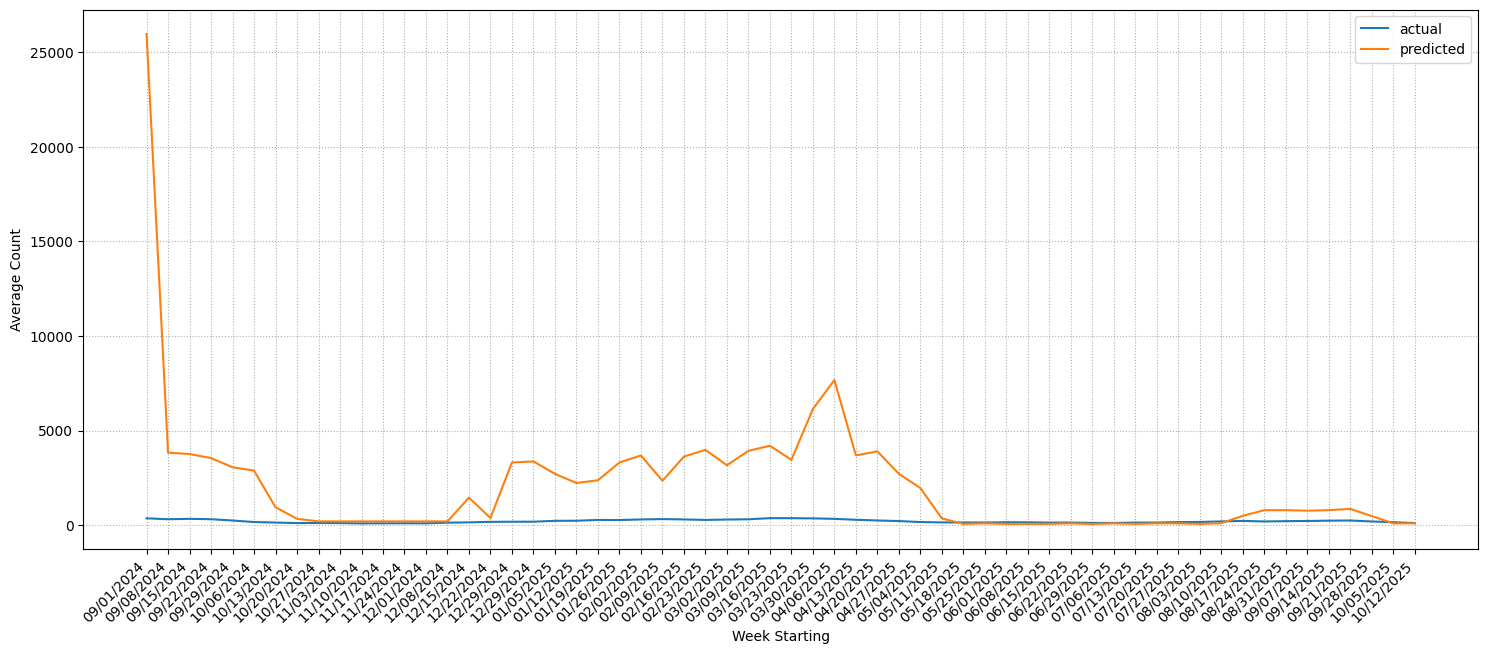

In [35]:
plot_line(y_test.to_list(), y_pred)

In [36]:
y_pred = rfg_model.predict(X_train)
models_train.append(gen_model_entry('Random Forest Regressor', y_train.to_list(), y_pred))

## Gradient Boost Regressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
gbr_model = reg.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

In [38]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4490.252313397527


In [39]:
models_test.append(gen_model_entry('Gradient Boost Regressor', y_test, y_pred))

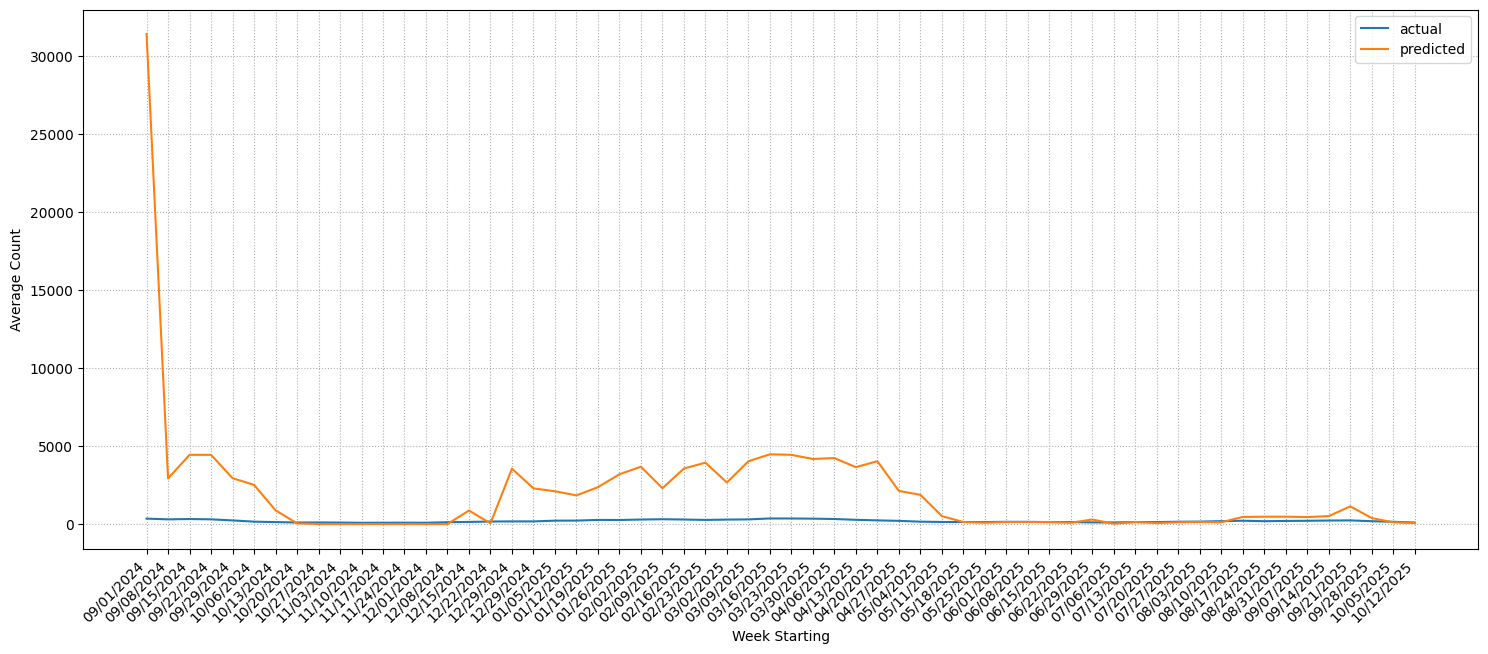

In [40]:
plot_line(y_test.to_list(), y_pred)

In [41]:
y_pred = gbr_model.predict(X_train)
models_train.append(gen_model_entry('Gradient Boost Regressor', y_train.to_list(), y_pred))

## XGBoost Regressor

In [42]:
import xgboost as xgb

reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=r_state)
xgb_model = reg.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [43]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

3629.255094086415


In [44]:
models_test.append(gen_model_entry('XGBoost Regressor', y_test, y_pred))

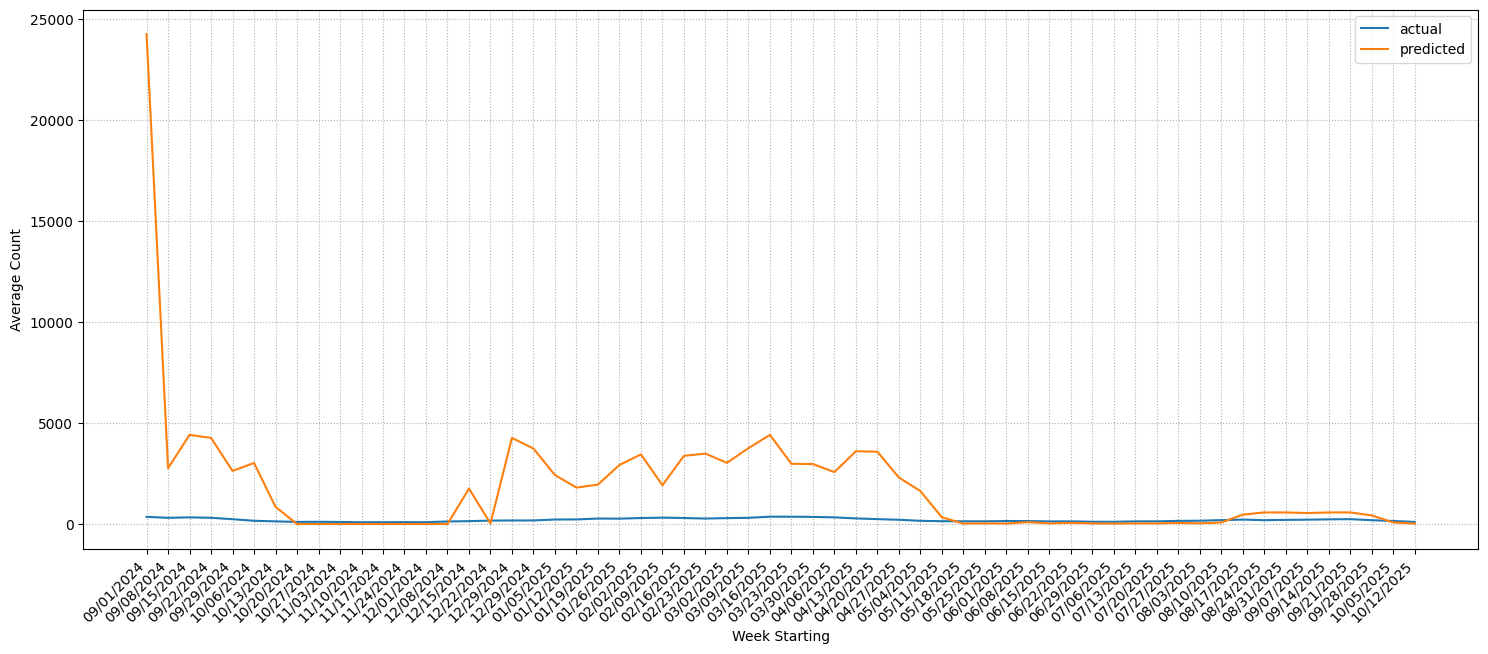

In [45]:
plot_line(y_test.to_list(), y_pred)

In [46]:
y_pred = xgb_model.predict(X_train)
models_train.append(gen_model_entry('XGBoost Regressor', y_train.to_list(), y_pred))

## Bayes Regressor

In [47]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
br_model = reg.fit(X_train, y_train)

y_pred = br_model.predict(X_test)

In [48]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

3493.069642909068


In [49]:
models_test.append(gen_model_entry('Bayes Regressor', y_test, y_pred))

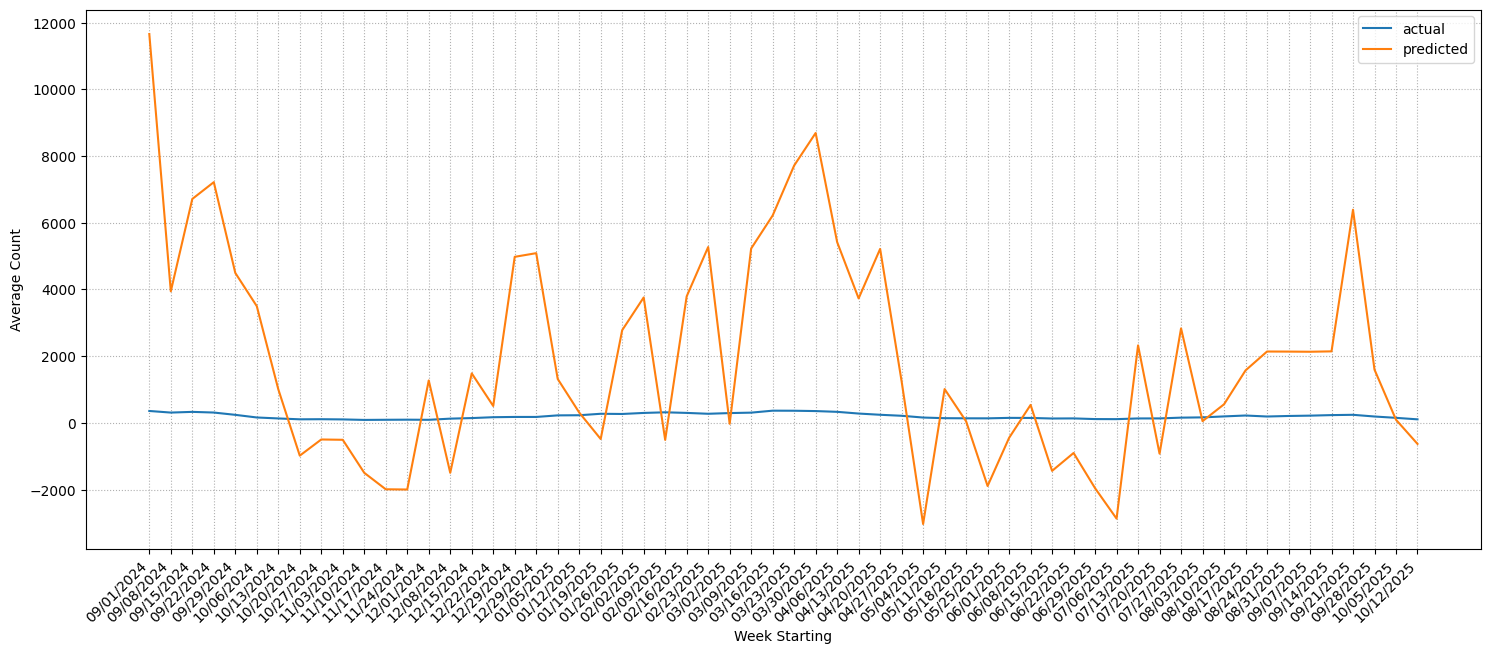

In [50]:
plot_line(y_test.to_list(), y_pred)

In [51]:
y_pred = br_model.predict(X_train)
models_train.append(gen_model_entry('Bayes Regressor', y_train.to_list(), y_pred))

## Linear Support Vector Regression

In [52]:
from sklearn.svm import LinearSVR

reg = LinearSVR()
lsvr_model = reg.fit(X_train, y_train)

y_pred = lsvr_model.predict(X_test)

In [53]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

52.149231202976864


In [54]:
models_test.append(gen_model_entry('LinearSVR Regressor', y_test, y_pred))

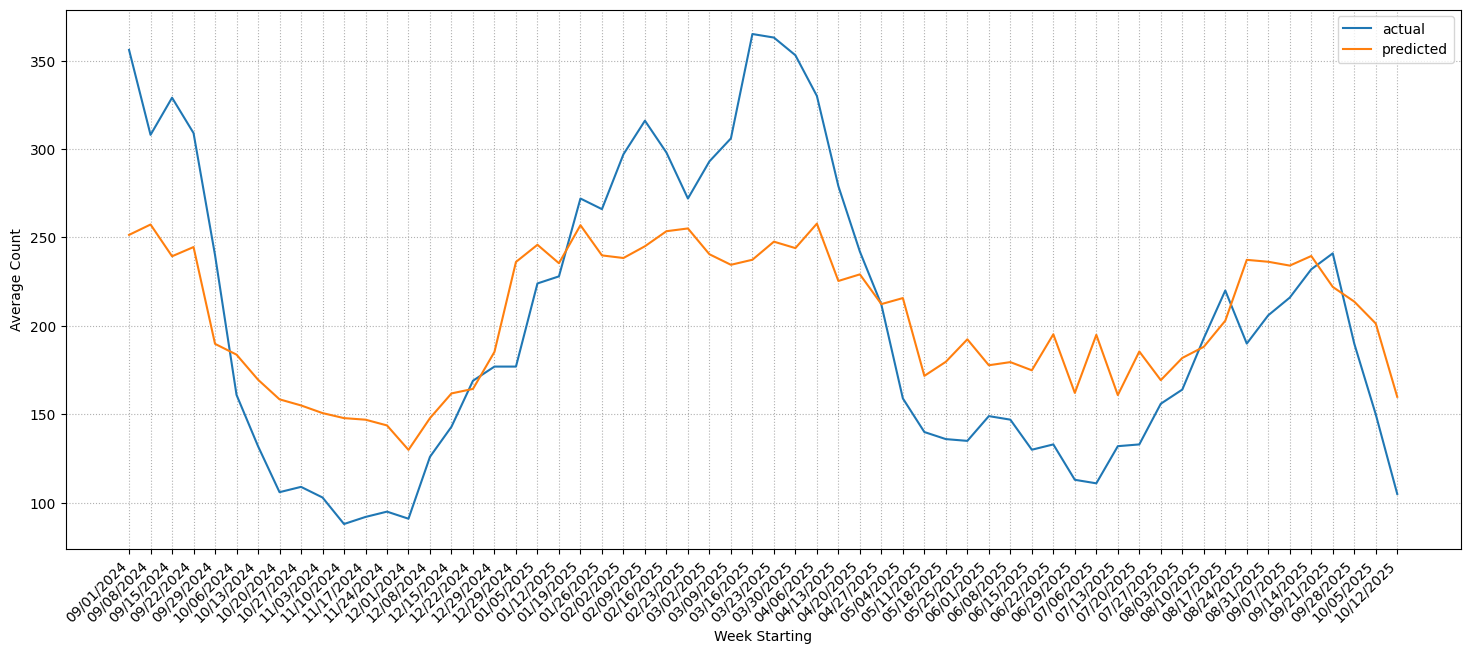

In [55]:
plot_line(y_test.to_list(), y_pred)

In [56]:
y_pred = lsvr_model.predict(X_train)
models_train.append(gen_model_entry('LinearSVR Regressor', y_train.to_list(), y_pred))

## SVR Regression

In [57]:
from sklearn.svm import SVR

reg = SVR()
svr_model = reg.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

In [58]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

691.4410762603774


In [59]:
models_test.append(gen_model_entry('SVR Regressor', y_test, y_pred))

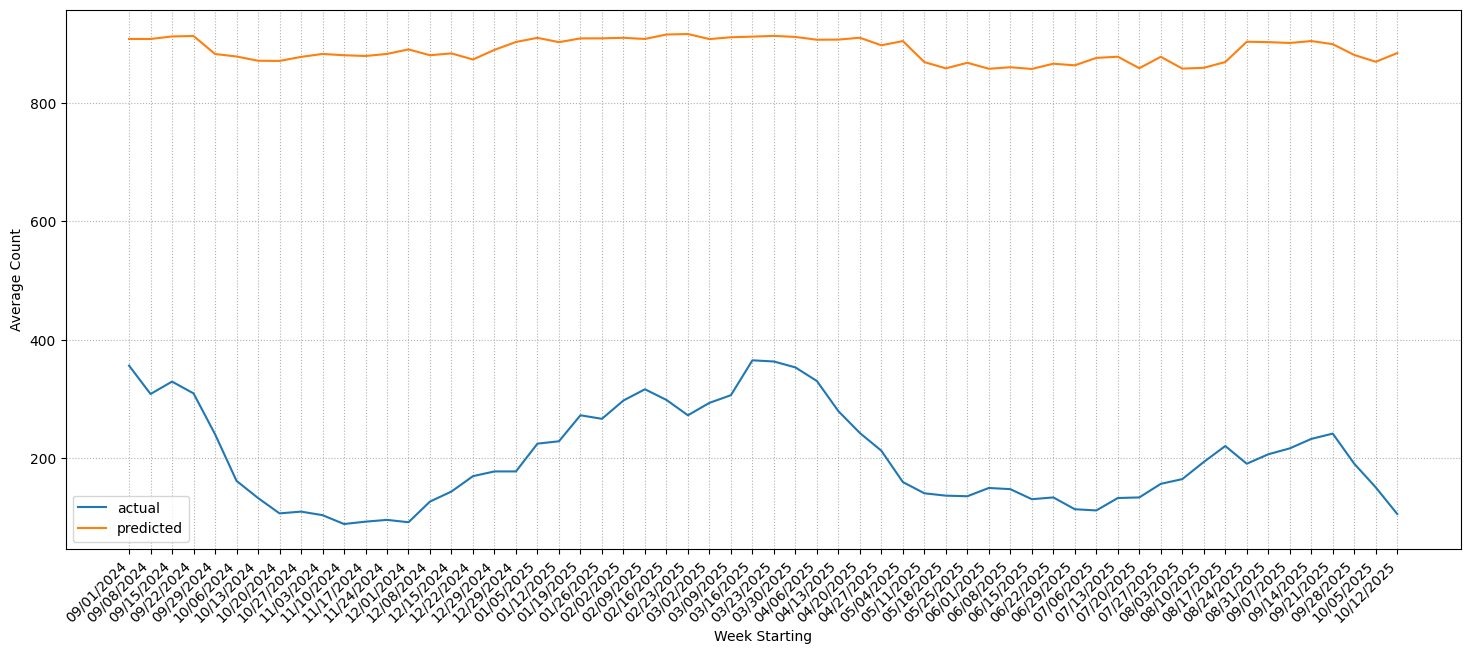

In [60]:
plot_line(y_test.to_list(), y_pred)

In [61]:
y_pred = svr_model.predict(X_train)
models_train.append(gen_model_entry('SVR Regressor', y_train.to_list(), y_pred))

## SGD Regressor

In [62]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()
sgd_model = reg.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

In [63]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

3431.522543773175


In [64]:
models_test.append(gen_model_entry('SGD Regressor', y_test, y_pred))

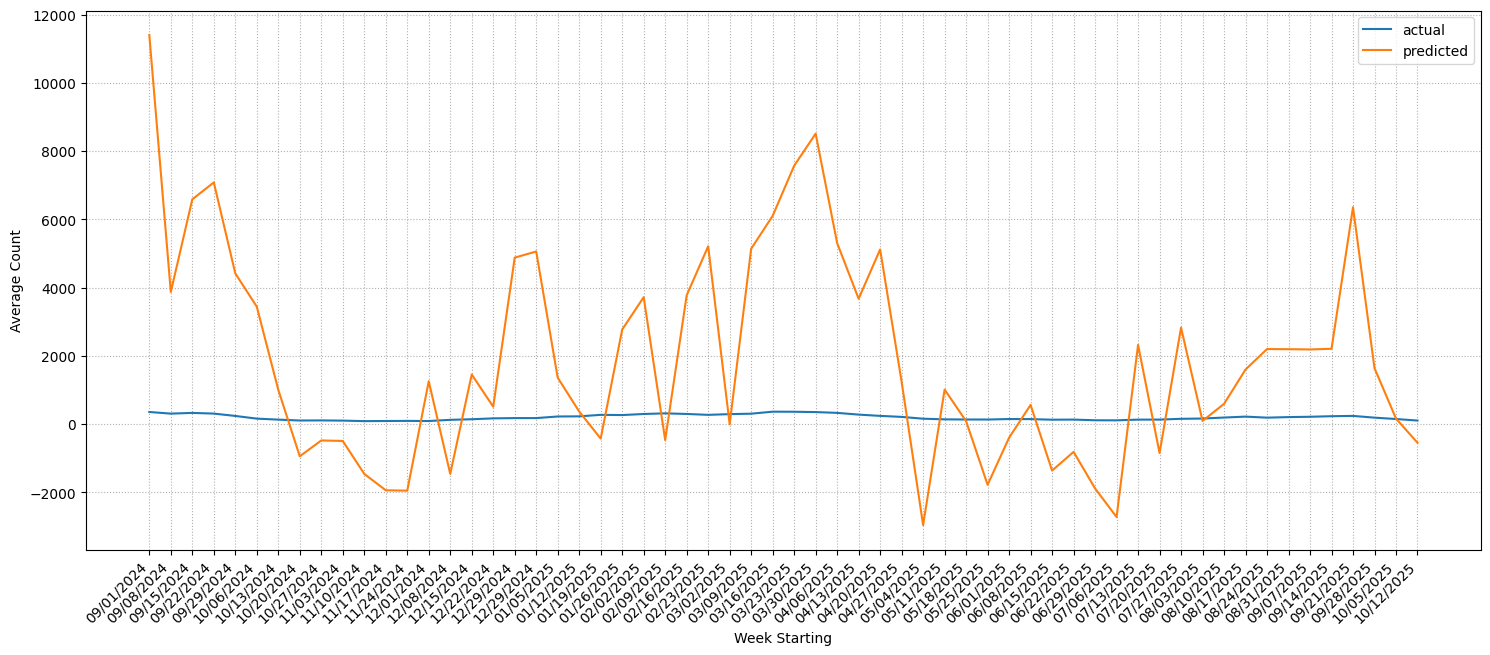

In [65]:
plot_line(y_test.to_list(), y_pred)

In [66]:
y_pred = sgd_model.predict(X_train)
models_train.append(gen_model_entry('SGD Regressor', y_train.to_list(), y_pred))

## Tabulate results

In [67]:
models_train_df = pd.DataFrame(models_train)
models_test_df = pd.DataFrame(models_test)

models_train_df['train_rmse'] = models_train_df['rmse']
models_test_df['test_rmse'] = models_test_df['rmse']

In [68]:
eval_df = pd.merge(models_train_df.drop(labels=['rmse'], axis=1), models_test_df.drop(labels=['rmse'], axis=1), on="model")

In [69]:
eval_df['diff'] = eval_df['train_rmse'] - eval_df['test_rmse']

In [70]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       11 non-null     object 
 1   train_rmse  11 non-null     float64
 2   test_rmse   11 non-null     float64
 3   diff        11 non-null     float64
dtypes: float64(3), object(1)
memory usage: 484.0+ bytes


In [71]:
eval_df.sort_values(by=['test_rmse'], axis=0, ascending=True)

,model,train_rmse,test_rmse,diff
8,LinearSVR Regressor,4452.034642,52.149231,4399.885410
9,SVR Regressor,4253.124542,691.441076,3561.683466
0,Dummy Regressor,4136.721000,1700.209199,2436.511801
10,SGD Regressor,2702.572149,3431.522544,-728.950394
7,Bayes Regressor,2700.912681,3493.069643,-792.156962
2,Linear Regressor,2700.671150,3522.477680,-821.806530
6,XGBoost Regressor,5.319849,3629.255094,-3623.935245
4,Random Forest Regressor,911.800605,4003.359467,-3091.558862
5,Gradient Boost Regressor,211.000531,4490.252313,-4279.251782
3,Tree Regressor,0.000000,4777.045168,-4777.045168


It appears that when comparing all models, the LinearSVR regressor was the best at predicting the number of cases on new data as the test data had the lowest root mean square error.  Further, it was less than the Dummy regressor whch was used to establish the baseline. All other models scored a higher test rmse value. 

I also wanted to point out that the diff between the train and test root mean square error was positive for the LinearSVR regressor, Dummy regressor and Logistic Regressor. This indicates there was no overfitting by these three models. The root mean square error calculation was lessser for the test rmse than it was for the training rmse.  All other models demonstrated higher training root mean square errors on the training data than the test data, indicating significant overfitting.

However, there is more that can be done to analayse and improve its performance. I will use a SHAP analaysis to identify the best predictors and I will also improve the model performance by tuning its hyperparameters through grid search.